###목표
- 10종류의 패션 이미지 데이터를 분류하는 신경망 모델을 만들어보자

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

In [2]:
data = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
len(data)

2

In [4]:
(X_train, y_train), (X_test, y_test) = data

In [5]:
X_train.shape, X_test.shape,  y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

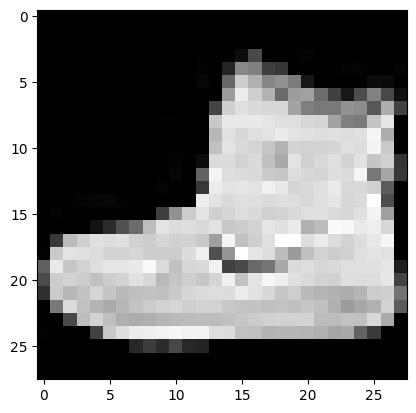

In [6]:
plt.imshow(X_train[0],cmap='gray')

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_val, y_train_one_hot, y_val_one_hot = train_test_split(X_train, y_train_one_hot, random_state=33)

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [13]:
model = Sequential()

model.add(Flatten(input_shape =(28, 28)))

model.add(Dense(250, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 250)               196250    
                                                                 
 dense_1 (Dense)             (None, 100)               25100     
                                                                 
 dense_2 (Dense)             (None, 50)                5050      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 226,910
Trainable params: 226,910
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['acc']
)

In [15]:
h = model.fit(X_train, y_train_one_hot, epochs=30, batch_size=256,validation_data=(X_val,y_val_one_hot))

Epoch 1/30
176/176 [==============================] - 8s 6ms/step - loss: 1.3387 - acc: 0.6074 - val_loss: 0.8722 - val_acc: 0.6976
Epoch 2/30
176/176 [==============================] - 1s 5ms/step - loss: 0.7586 - acc: 0.7274 - val_loss: 0.6971 - val_acc: 0.7487
Epoch 3/30
176/176 [==============================] - 1s 6ms/step - loss: 0.6629 - acc: 0.7533 - val_loss: 0.6836 - val_acc: 0.7519
Epoch 4/30
176/176 [==============================] - 1s 7ms/step - loss: 0.6445 - acc: 0.7552 - val_loss: 0.6550 - val_acc: 0.7571
Epoch 5/30
176/176 [==============================] - 1s 6ms/step - loss: 0.6420 - acc: 0.7538 - val_loss: 0.6764 - val_acc: 0.7354
Epoch 6/30
176/176 [==============================] - 1s 4ms/step - loss: 0.6221 - acc: 0.7602 - val_loss: 0.6161 - val_acc: 0.7738
Epoch 7/30
176/176 [==============================] - 1s 4ms/step - loss: 0.5976 - acc: 0.7744 - val_loss: 0.6434 - val_acc: 0.7646
Epoch 8/30
176/176 [==============================] - 1s 5ms/step - loss: 0.

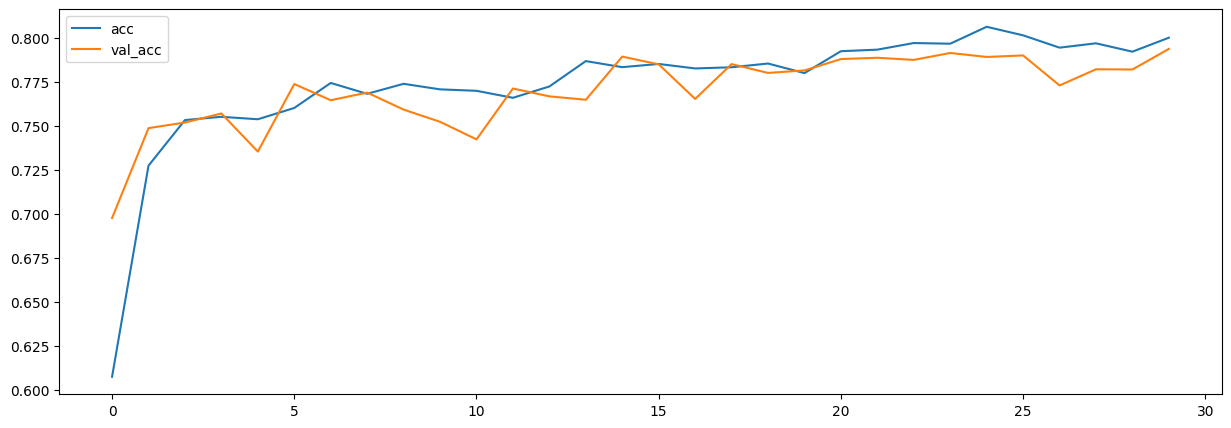

In [16]:
plt.figure(figsize=(15,5))
plt.plot(h.history['acc'], label='acc')
plt.plot(h.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

In [17]:
model.evaluate(X_test, y_test_one_hot)

313/313 [==============================] - 2s 6ms/step - loss: 0.5733 - acc: 0.7876


[0.5733233690261841, 0.7875999808311462]

- 앞선 손글씨 이미지 데이터와 동일한 형태의 데이터를 동일한 구조로 학습시켰지만 정확도가 차이나는 이유는 패션데이터의 복잡도가 더 높았기 때문에